In [2]:
# Module 6: Classification

# 분류는 other attribute(predictor variables)의 값을 바탕으로 nominal-valued 속성(클래스 레이블)을 예측하는 작업이다. 
# 이 튜토리얼의 목표는 다음과 같다.
# 1. Scikit-learn 라이브러리 패키지로부터 다른 분류 기법을 사용하는 예를 제공.
# 2. 모델 오버핏의 문제를 보인다.




#6.1 Vertebrate Dataset
# 3장-3.1에서 썼던 variation of the vertebrate data(척추 동물 데이터의 변형)을 사용한다. 
# 척추동물은 'set of explanatory 속성(predictor variables)' 를 기반으로 하여 포유류, 파충류, 조류, 어류, 양서류의 5가지 카테고리로 분류된다. 
# name 을 제외한 나머지 속성들은 'one hot encoding binary representation'으로 변환되었다.
# 이를 설명하기 위해 먼저 Pandas DataFrame 객체에 데이터를 로드하고 내용을 display 해본다.


import pandas as pd

data = pd.read_csv('6.vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [3]:
# training examples가 limited 인 경우에 -> binary classification task로 변환한다고 해보자.(포유류 mammals와 비포유류로)


# 클래스 레이블이 mammals가 아닌 것들은 다 non-mammals로 replace 하는 코드
data['Class'] = data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')

data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


In [4]:
# "Warm-blooded(정온 동물)"와 "Gives Birth(출산-새끼를 낳음)"사이의 관계를 examine 하기 위해 Pandas cross-tabulation을 적용할 수 있다. 

# cross- tabulation이란? : 교차분석 
# 실제빈도와 기대빈도간의 비교 분석을 통해 두 변수간의 독립성 및 동질성 여부를 분석하는데에 이용.
# 2개 변수가 가진 각 범주를 교차하여 해당 빈도를 표시하는 교차 분석표를 작성함으로써 분석.


pd.crosstab([data['Warm-blooded'],data['Gives Birth']],data['Class'])

Class                     mammals  non-mammals
Warm-blooded Gives Birth                      
0            0                  0            7
             1                  0            1
1            0                  0            2
             1                  5            0

In [6]:
# 위의 결과는 Warm blooded와 Give Birth 두 속성만으로 mammals와 non-mammals를 구분할 수 있다는 것을 보여준다.
# 두 속성의 조합이 같은 클래스에 속하는 인스턴스들만 산출하기 때문에

# 예를들어, mammals는 자식을 출산(give birth)하는 정온 척추 동물(warm-blooded vertebrates)로 identified.
# 이런 relationship은 decision tree classifier을 사용해서 도출될 수 있다. (3.2에 제시됨)






# 3.2 Decision Tree Classifier
# 이번 섹션에서는 vertebrate 데이터셋에 decision tree classifier 을 적용시켜본다.

from sklearn import tree
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)


clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3) 
clf = clf.fit(X, Y)


# 위의 코드는 vertebrate 데이터셋에서 predictor(X)와 target class(Y)를 추출하고 entropy를 사용하여 decision tree classifier객체를 만든다. 
# 분할 기준(splitting criterion)을 위한 불순도 척도(impurity measure)로써 엔트로피 사용

# sklearn 라이브러리는 불순도척도로서 'gini'를 지원한다.

# 위의 classifier는 최대 depth가 3인 트리를 생성하는 것으로 제한된다. (max_depth=3)
# classifier는 fit()를 사용하여 labeled data 를 훈련시킨다.







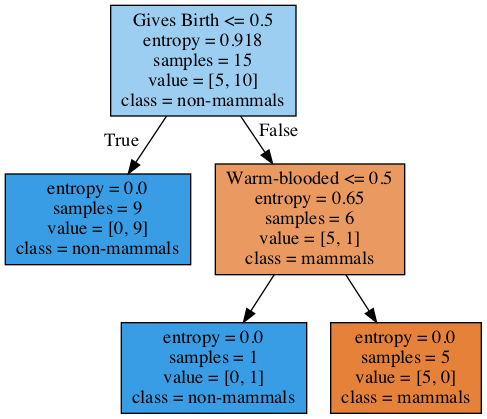

In [8]:
# classifier를 훈련시킨 결과로서 decision tree 를 plot 할 수 있다. -> graphviz와 pydotplus 설치해야함.

import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names = X.columns, class_names=['mammals','non-mammals'], filled=True,out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [10]:
# 다음으로, 다음과 같은 test examples를 분류하기 위해 decision tree를 적용한다고 suppose하자.



testData = [['gila monster',0,0,0,0,1,1,'non-mammals'], ['platypus',1,0,0,0,1,1,'mammals'], ['owl',1,0,0,1,1,0,'non-mammals'], ['dolphin',1,1,1,0,0,0,'mammals']]


testData = pd.DataFrame(testData, columns=data.columns)
testData

#일단 테스트 데이터 생성하기

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,gila monster,0,0,0,0,1,1,non-mammals
1,platypus,1,0,0,0,1,1,mammals
2,owl,1,0,0,1,1,0,non-mammals
3,dolphin,1,1,1,0,0,0,mammals


In [11]:
# test data로부터 predictor과 target class attributes를 추출하고 그들의 클래스를 classifier 하기 위해 decision tree를 적용한다.


testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Name,Predicted Class
0,gila monster,non-mammals
1,platypus,non-mammals
2,owl,non-mammals
3,dolphin,mammals


In [13]:
# '알을 낳는 포유류인' platypus(오리너구리)를 제외하고 classifier는 test example를 정확히 예측한다.

# 우리는 아래의 예와 같이 test data에 대한 classifier의 정확도를 계산할 수 있다.

from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))



#4개중에 오리너구리 빼고 맞췄으므로 75프로

Accuracy on test data is 0.75


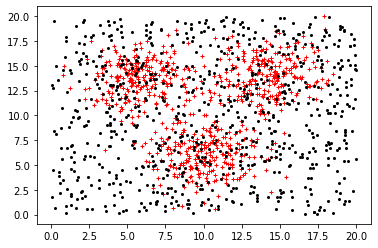

In [14]:
# 3.3 Model Overfitting

# 1500개의 라벨이 있는 인스턴스가 있는 2차원 dataset을 보자. 각 인스턴스는 두 클래스 (0 또는 1)중 하나에 assign 된다.
# 각 클래스의 인스턴스는 다음과 같이 생성된다.
# 1. 클래스 1의 인스턴스는 각각 [6,14], [10,6], [14 14]를 중심으로 3개의 가우스 분포의 혼합에서 생성된다.
# 2. 클래스 0의 인스턴스는  예는 정사각형(한 변의 길이 20) 영역의 균일한(uniform) 분포에서 생성된다. 

# 단순하게 하기 위해 두 클래스에는 같은 수의 labeled instance들이 있다.
# 데이터를 생성하고 플로팅하기 위한 코드는 아래와 같다.
# 클래스 1 -> 빨간색, 클래스 0 -> 검은색



import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  #diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6)))) 
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6)))) 
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

Text(0, 0.5, 'Accuracy')

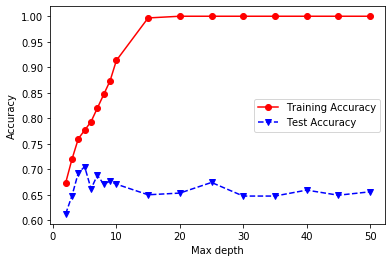

In [15]:
# 이 예에서 80%는 training에 남은 20%는 testing에 reserve한다.
# 그 다음 diffferent maximum depth(2~50)인 decision tree를 training set에 fit 한다.
# training and test set에 적용할 때 각각의 정확도를 plot 한다.


######################################
# Training and Test set 생성
######################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score


######################################
# Model fitting and evaluation
######################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train,Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
    

######################################
# Plot of training and test accuracies
######################################    


plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy']) 
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
    
    

Text(0, 0.5, 'Accuracy')

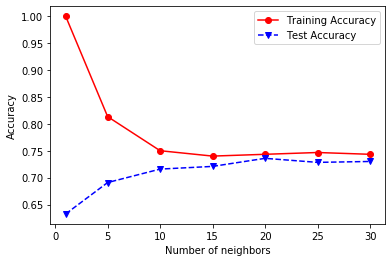

In [16]:
# 위의 그림은 트리의 최대 깊이가 증가함에 따라(즉, 모델이 더 복잡해짐에 따라) training accuracy가 계속 향상된다.
# 그러나 test accuracy는 처음에 최대 깊이 5까지 improve된 후 model overfitting 으로 인해 점차 감소한다.



# 3.4 Alternative Classification Techniques
# python sklearn 라이브러리는 decision tree classifier뿐 아니라 다른 분류 기법도 지원한다.
# 이번 섹션에서는, 전 섹션에서 주어진 2차원 데이터에 
# k-nearest neighbor classifier / linear classifier(logistic regression and support vector machine) / 
# ensemble 메소드(boosting, bagging, random forest)를 적용하는 방법의 예를 보일 것이다.

# 3.4.1 K-Nearest neighbor classifier
# test 인스턴스의 클래스 라벨은 k closest training 인스턴스의 majority 클래스를 기반으로 예측된다.
# nearest neighbors의 수인 k는 distance metric과 함께 유저가 제공해야하는 hyperparameter 이다.
# 디폴트로, 우리는 유클리드 distance를 사용한다(exponent factor가 p=2인 Minkowski distance와 같은)





from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 10, 15, 20, 25, 30] 
trainAcc = []
testAcc = []


for k in numNeighbors: 
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2) 
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test) 
    trainAcc.append(accuracy_score(Y_train, Y_predTrain)) 
    testAcc.append(accuracy_score(Y_test, Y_predTest))
    
    
plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')












Text(0, 0.5, 'Accuracy')

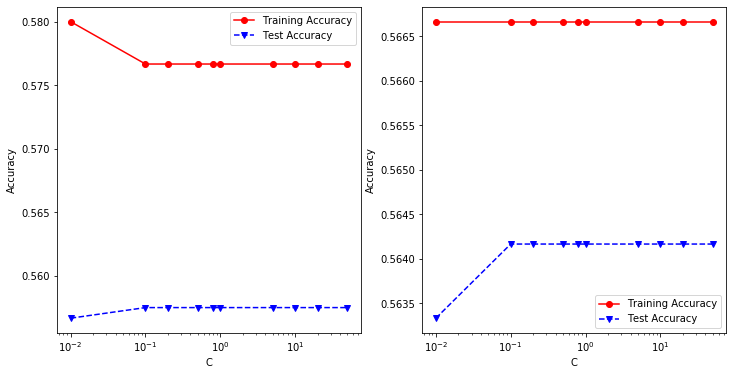

In [17]:
# 3.4.2 Linear Classifiers

# logistic regression and support vector machine(SVM)과 같은 Linear classifier는 다른 클래스들로부터 인스턴스를 구분하기위해
# linear separating hyperplane을 구성한다.

# logisitic regression의 경우 아래의 방정식으로 설명할 수 있고, (w,b)는 다음의 regularized negative log-likelihood 함수를 optimizing 함으로써 추정된다.






from sklearn import linear_model
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []


for param in C:
    clf = linear_model.LogisticRegression(C=param) 
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    LRtrainAcc.append(accuracy_score(Y_train, Y_predTrain)) 
    LRtestAcc.append(accuracy_score(Y_test, Y_predTest))
    
    
    clf = SVC(C=param,kernel='linear')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test) 
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain)) 
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))
    
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy']) 
ax1.set_xlabel('C')
ax1.set_xscale('log') 
ax1.set_ylabel('Accuracy')


ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--') 
ax2.legend(['Training Accuracy','Test Accuracy']) 
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

In [18]:
# 주어진 2차원 데이터셋에 대해 클래스 사이의 true decision boundaries가 비선형(nonlinear)이기 때문에 linear classifier는 성능이 좋지 않다는 점을 유의하라

Text(0, 0.5, 'Accuracy')

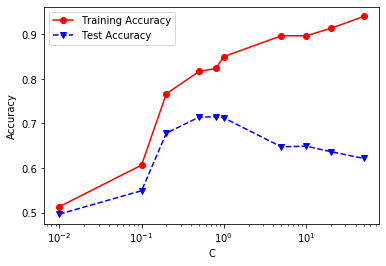

In [19]:
# 3.4.3 Nonlinear Support Vector Machine

# 아래 코드는 2차원 데이터셋에 맞도록 Gaussian radial basis function kernel과 함께 nonlinear support vector을 사용한 예를 보인다.

from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50] 
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(Y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(Y_test, Y_predTest))
    
plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--') 
plt.legend(['Training Accuracy','Test Accuracy']) 
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

In [20]:
# nonlinear SVM이 linear SVM에 비해 높은 test accuracy를 달성할 수 있는지 observe하라.

[Text(0, 0, 'Random Forest'), Text(0, 0, 'Bagging'), Text(0, 0, 'AdaBoost')]

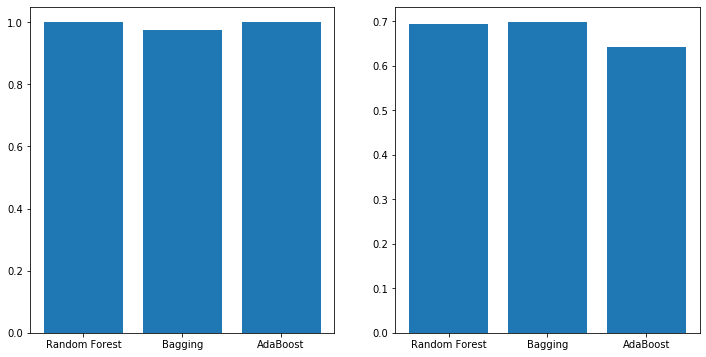

In [24]:
# 3.4.4 Ensemble Methods

# ensemble classifier는 training data로부터 base classifiers의 set을 구성하고, 
# 각각의 base classifier에 의한 예측에 대한 투표를 실시하여 분류를 시행한다.

# 우리는 bagging,boosting,random forest 세 종류의 ensemble classifier를 consider해본다. (자세한 설명은 섹션 4.10)

# 아래의 예에서 각각의 ensemble 메소드를 사용하여 2차원 데이터셋에 500개의 base classifier를 fit 시킨다.
# base classifier는 최대 깊이가 10인 decision tree이다.


from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500 
maxdepth = 10
trainAcc = []
testAcc = []


clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test) 
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))


clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain)) 
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost'] 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc) 
ax1.set_xticks([1.5,2.5,3.5]) 
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

In [ ]:
# 3.5 Summary

# 이 절에서는 지정된 입력 데이터로부터 분류 모델을 작성하기 위해 Python sklearn 라이브러리를 사용하는 몇 가지 예를 제공한다.
# 우리는 또한 model overfitting의 문제를 설명하고 주어진 데이터 집합에 다른 분류 방법을 적용하는 방법을 보여준다.